<a href="https://colab.research.google.com/github/hkd7148-blip/ml-portfolio/blob/main/stability_story_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests pillow


In [ ]:
from google.colab import userdata

api_key = userdata.get("STABILITY_API_KEY")
print("API key loaded:", api_key is not None)


API key loaded: True


In [ ]:
import requests
from google.colab import userdata

api_key = userdata.get("STABILITY_API_KEY")

prompt = "A clean modern telegram story illustration: a cozy desk with laptop, coffee, soft light, minimalist style, vertical composition, high quality"

response = requests.post(
    "https://api.stability.ai/v2beta/stable-image/generate/sd3",
    headers={
        "authorization": f"Bearer {api_key}",
        "accept": "image/*"
    },
    files={"none": ''},
    data={
        "prompt": prompt,
        "output_format": "jpeg",
        # если у тебя в аккаунте/эндпоинте поддерживается размер — добавь:
        # "aspect_ratio": "9:16",
    },
)

print("Status:", response.status_code)

if response.status_code == 200:
    with open("story.jpg", "wb") as f:
        f.write(response.content)
    print("Saved: story.jpg")
else:
    try:
        print(response.json())
    except Exception:
        print(response.text)
    raise RuntimeError("Stability API request failed")


Status: 200
Saved: story.jpg


Size: (1024, 1024)


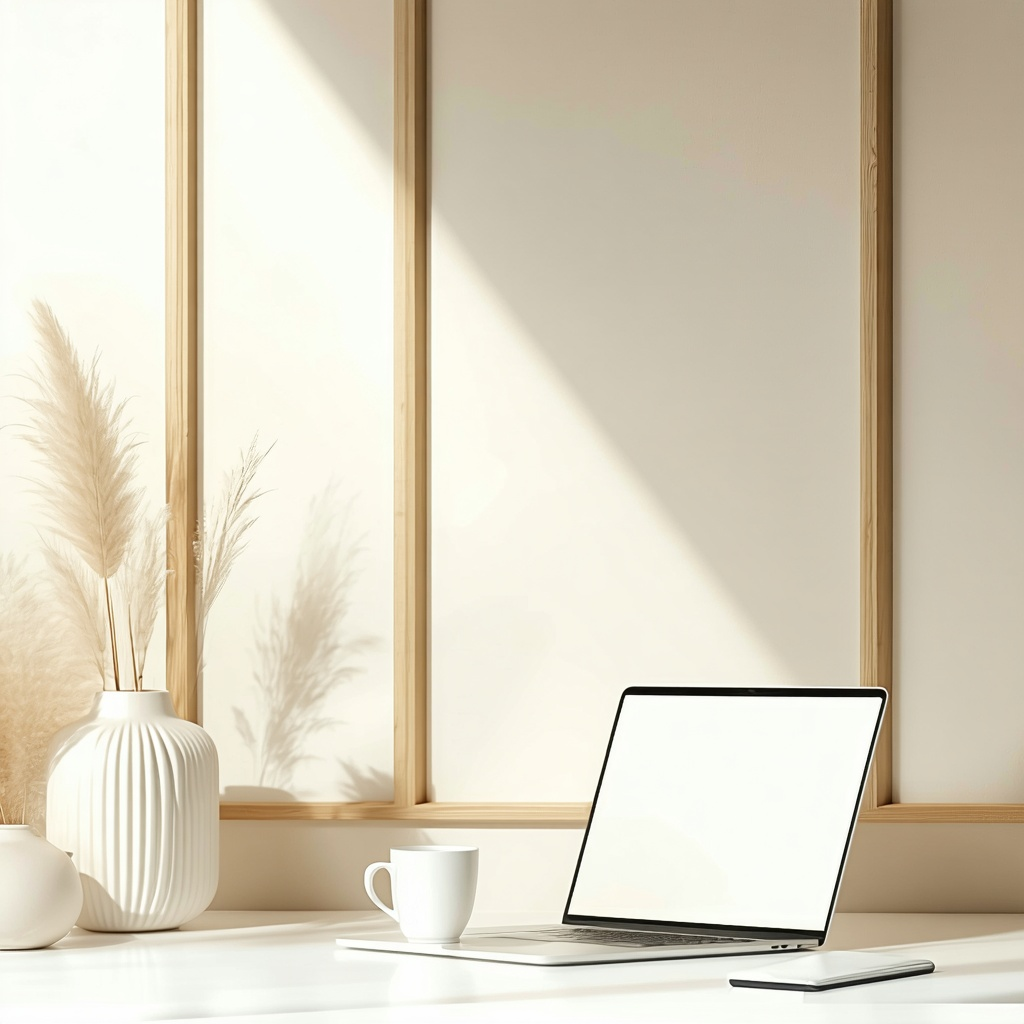

In [ ]:
from PIL import Image
from IPython.display import display

img = Image.open("story.jpg")
print("Size:", img.size)
display(img)


In [ ]:
from PIL import ImageFont
font = ImageFont.load_default()


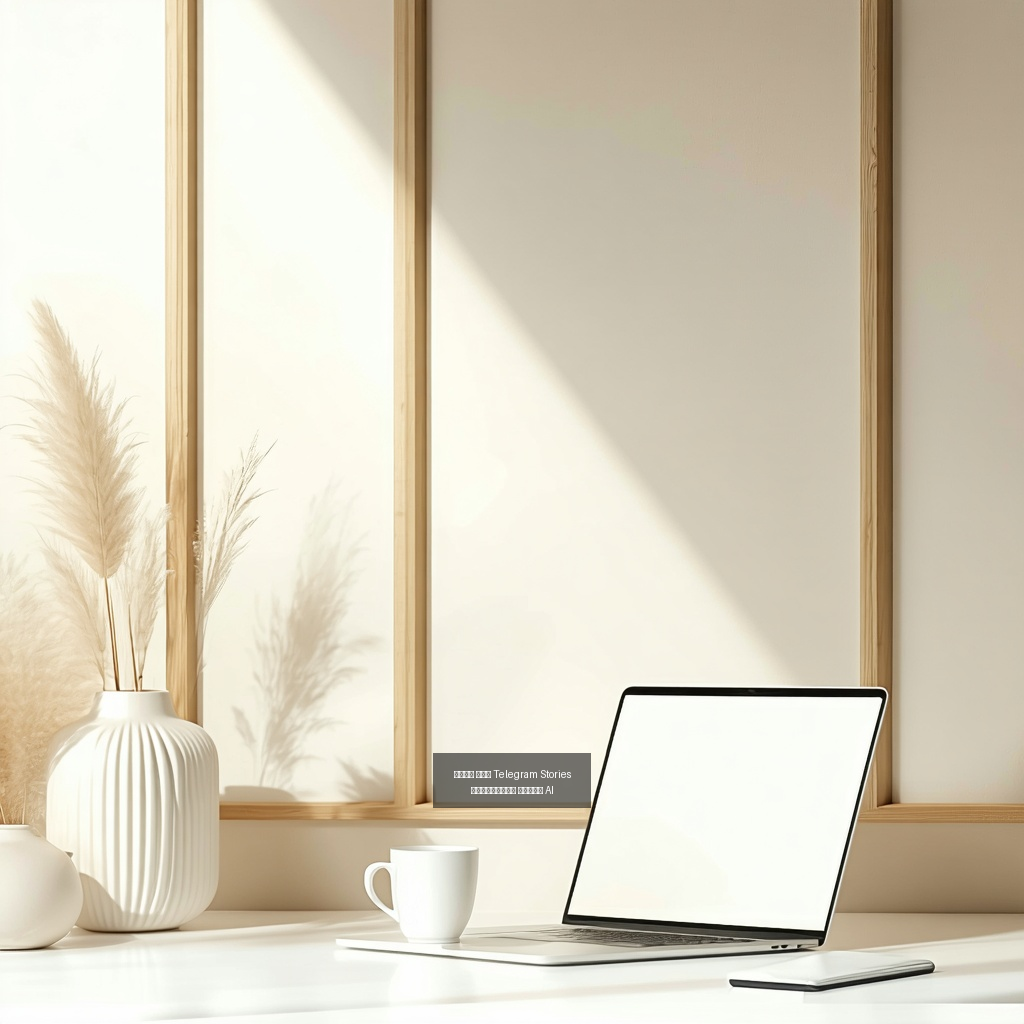

Saved: story_with_text.png


In [ ]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

# Открываем изображение
img = Image.open("story.jpg").convert("RGBA")
width, height = img.size

draw = ImageDraw.Draw(img)

# Используем стандартный шрифт
font = ImageFont.load_default()

# Текст для Stories
text = "Идеи для Telegram Stories\nГенерация через AI"

# Размер текста
bbox = draw.multiline_textbbox((0, 0), text, font=font, spacing=6)
text_width = bbox[2] - bbox[0]
text_height = bbox[3] - bbox[1]

# Центр по горизонтали, низ по вертикали
x = (width - text_width) / 2
y = height * 0.75

# Полупрозрачная подложка
overlay = Image.new("RGBA", img.size, (0, 0, 0, 0))
overlay_draw = ImageDraw.Draw(overlay)
overlay_draw.rectangle(
    [x - 20, y - 15, x + text_width + 20, y + text_height + 15],
    fill=(0, 0, 0, 140)
)

# Объединяем
img = Image.alpha_composite(img, overlay)

# Рисуем текст
draw = ImageDraw.Draw(img)
draw.multiline_text(
    (x, y),
    text,
    font=font,
    fill=(255, 255, 255, 255),
    align="center",
    spacing=6
)

# Сохраняем итог
img.convert("RGB").save("story_with_text.png")

display(img)
print("Saved: story_with_text.png")


In [ ]:
import requests
from google.colab import userdata

api_key = userdata.get("STABILITY_API_KEY")

prompt = (
    "vertical inspirational illustration for telegram story, "
    "a person standing on a mountain at sunrise, minimal style, "
    "soft light, calm colors, modern digital art"
)

response = requests.post(
    "https://api.stability.ai/v2beta/stable-image/generate/sd3",
    headers={
        "authorization": f"Bearer {api_key}",
        "accept": "image/*"
    },
    files={"none": ''},
    data={
        "prompt": prompt,
        "output_format": "jpeg",
    },
)

print("Status:", response.status_code)

if response.status_code == 200:
    with open("story_new.jpg", "wb") as f:
        f.write(response.content)
    print("Saved: story_new.jpg")
else:
    raise RuntimeError("Image generation failed")


Status: 200
Saved: story_new.jpg


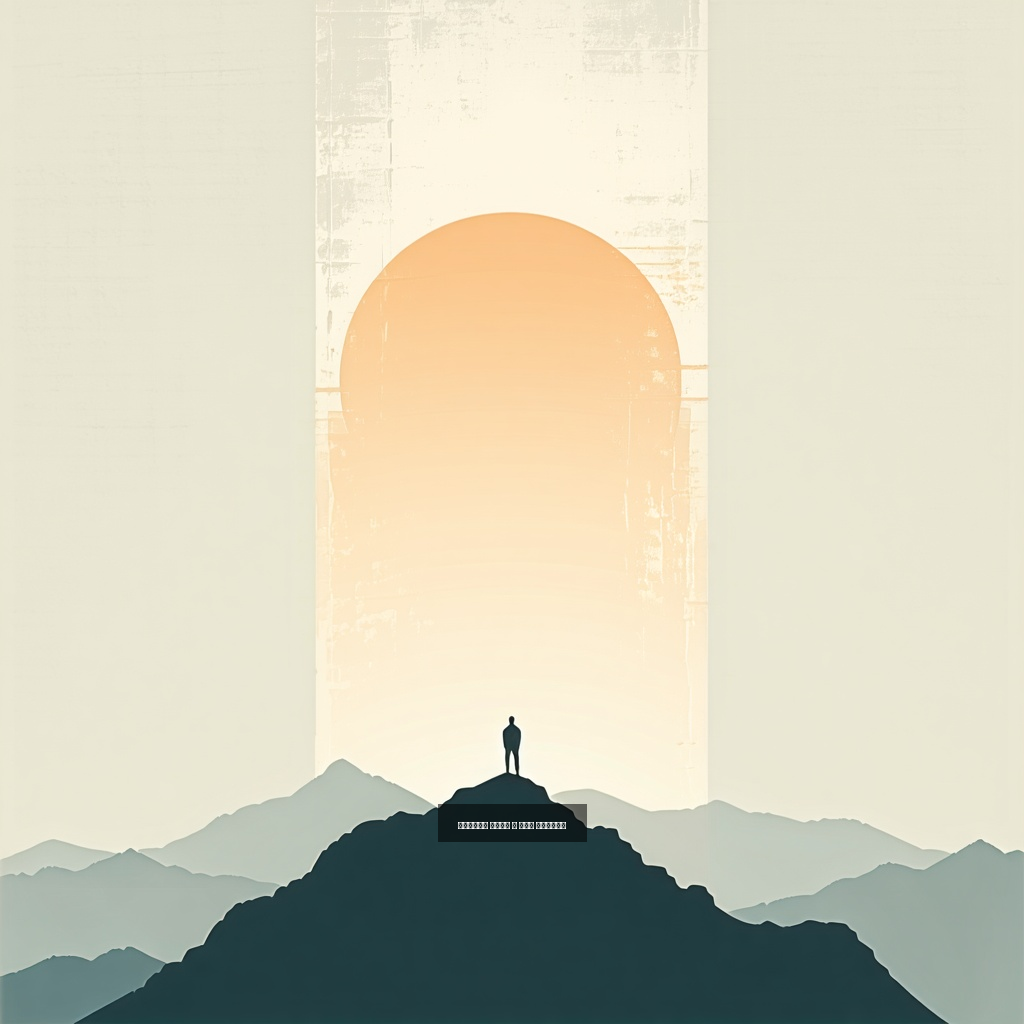

Saved: story_new_with_text.png


In [ ]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

img = Image.open("story_new.jpg").convert("RGBA")
width, height = img.size

draw = ImageDraw.Draw(img)
font = ImageFont.load_default()

text = "Каждый день — шаг вперёд"

bbox = draw.textbbox((0, 0), text, font=font)
text_width = bbox[2] - bbox[0]
text_height = bbox[3] - bbox[1]

x = (width - text_width) / 2
y = height * 0.8

overlay = Image.new("RGBA", img.size, (0, 0, 0, 0))
overlay_draw = ImageDraw.Draw(overlay)
overlay_draw.rectangle(
    [x - 20, y - 15, x + text_width + 20, y + text_height + 15],
    fill=(0, 0, 0, 140)
)

img = Image.alpha_composite(img, overlay)

draw = ImageDraw.Draw(img)
draw.text((x, y), text, font=font, fill=(255, 255, 255, 255))

img.convert("RGB").save("story_new_with_text.png")

display(img)
print("Saved: story_new_with_text.png")


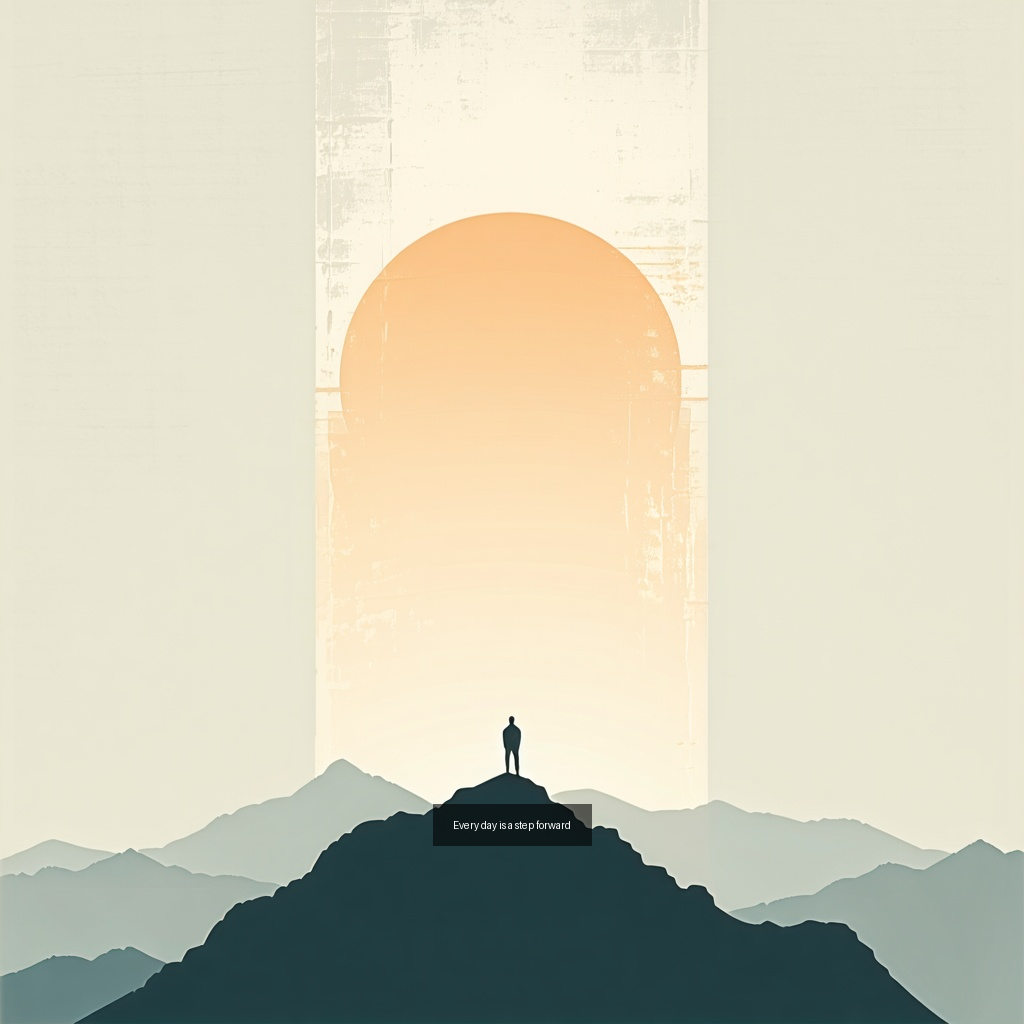

Saved: story_new_with_text.png


In [ ]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

# Open generated image
img = Image.open("story_new.jpg").convert("RGBA")
width, height = img.size

draw = ImageDraw.Draw(img)

# Default font (ASCII-safe)
font = ImageFont.load_default()

# English text (IMPORTANT: ASCII only)
text = "Every day is a step forward"

# Calculate text size
bbox = draw.textbbox((0, 0), text, font=font)
text_width = bbox[2] - bbox[0]
text_height = bbox[3] - bbox[1]

# Position: bottom center
x = (width - text_width) / 2
y = height * 0.8

# Background rectangle
overlay = Image.new("RGBA", img.size, (0, 0, 0, 0))
overlay_draw = ImageDraw.Draw(overlay)
overlay_draw.rectangle(
    [x - 20, y - 15, x + text_width + 20, y + text_height + 15],
    fill=(0, 0, 0, 150)
)

# Merge overlay
img = Image.alpha_composite(img, overlay)

# Draw text
draw = ImageDraw.Draw(img)
draw.text((x, y), text, font=font, fill=(255, 255, 255, 255))

# Save final image
img.convert("RGB").save("story_new_with_text.png")

display(img)
print("Saved: story_new_with_text.png")
